# Attribute Information:

- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit : 
 - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
 - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
 - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
 - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

# Source 

https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

# Your Task:

Predict the number of rental bikes in a day! 

# Questions?

- Is this supervised or unsupervised learning?
- Is this regression or classification?


In [183]:
import numpy as np 
import matplotlib.pyplot as plt 
import math
import pandas as pd 
from pandas import DataFrame, Series
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split, cross_val_score
from  sklearn.metrics import mean_squared_error
%matplotlib notebook
import sklearn
print sklearn.__version__

0.19.0


In [159]:
help(sklearn.metrics.regression)

Help on module sklearn.metrics.regression in sklearn.metrics:

NAME
    sklearn.metrics.regression - Metrics to assess performance on regression task

FILE
    c:\anaconda2\lib\site-packages\sklearn\metrics\regression.py

DESCRIPTION
    Functions named as ``*_score`` return a scalar value to maximize: the higher
    the better
    
    Function named as ``*_error`` or ``*_loss`` return a scalar value to minimize:
    the lower the better

FUNCTIONS
    explained_variance_score(y_true, y_pred, sample_weight=None, multioutput='uniform_average')
        Explained variance regression score function
        
        Best possible score is 1.0, lower values are worse.
        
        Read more in the :ref:`User Guide <explained_variance_score>`.
        
        Parameters
        ----------
        y_true : array-like of shape = (n_samples) or (n_samples, n_outputs)
            Ground truth (correct) target values.
        
        y_pred : array-like of shape = (n_samples) or (n_samples,

In [160]:
bikes = pd.read_csv("dataset/bikeSharingByDay.csv")
bikes.head(5)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [161]:
bikes.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

# Exploratory Data Analysis

<IPython.core.display.Javascript object>


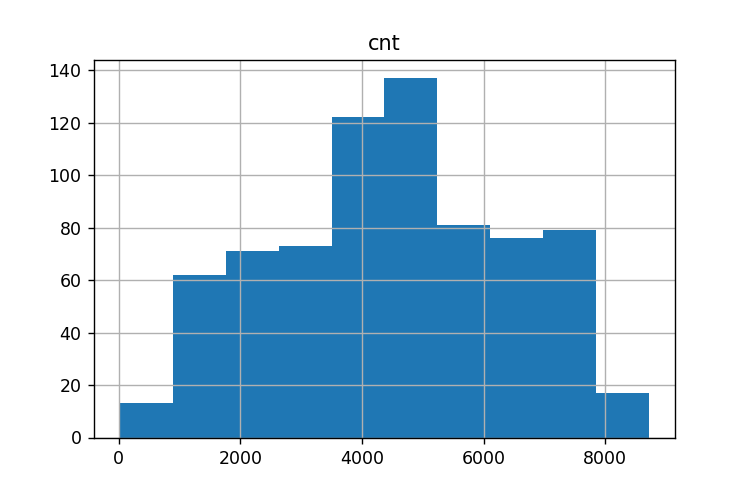

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000014111F60>]], dtype=object)

In [162]:
bikes.hist("cnt")

<IPython.core.display.Javascript object>


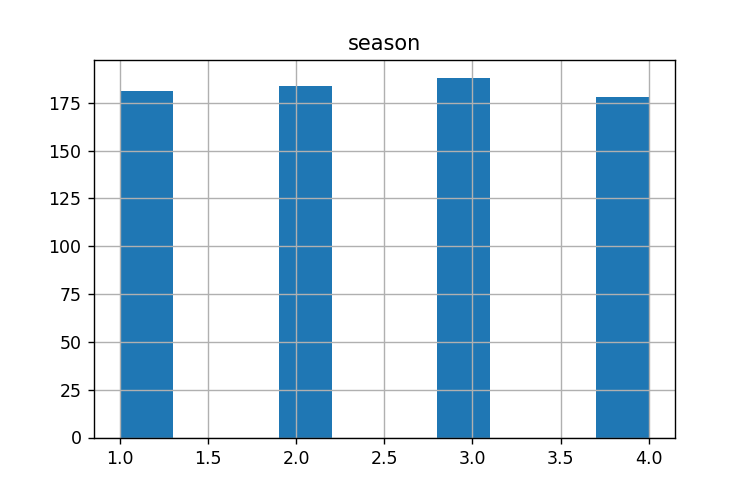

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000144026D8>]], dtype=object)

In [163]:
bikes.hist("season")

<IPython.core.display.Javascript object>


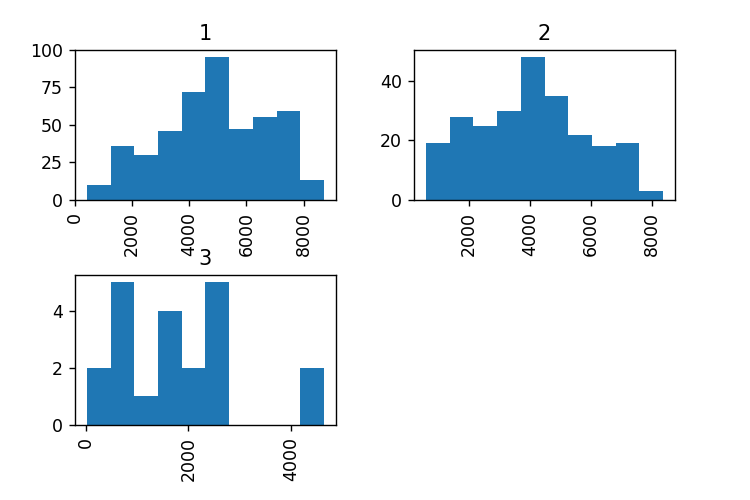

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000002D888860>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000002DAD86D8>]], dtype=object)

In [205]:
bikes.hist("cnt", by="weathersit")

<IPython.core.display.Javascript object>


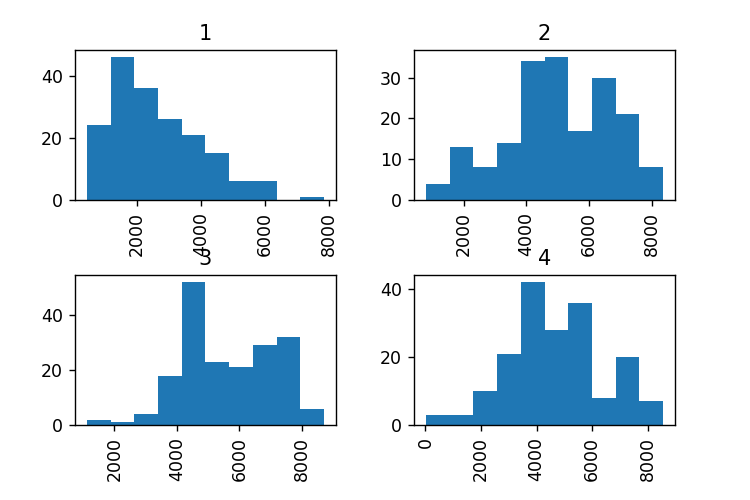

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000002E489EF0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000002C6A36D8>]], dtype=object)

In [207]:
bikes.hist("cnt", by="season")

<IPython.core.display.Javascript object>


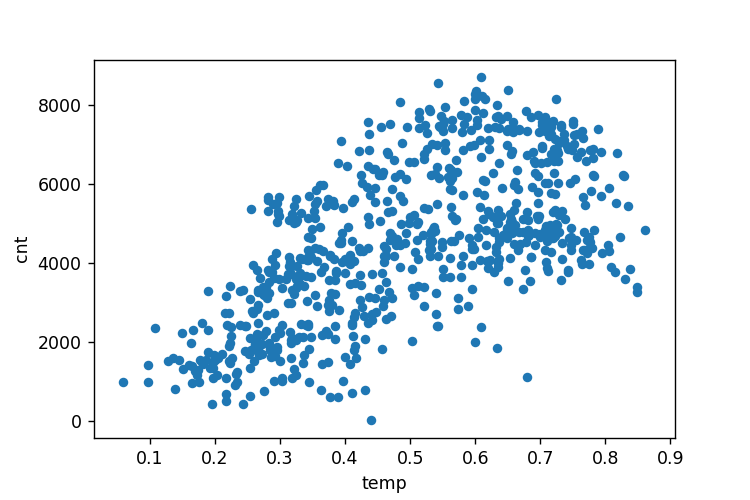

In [166]:
bikes.plot.scatter(x='temp', y="cnt")

<IPython.core.display.Javascript object>


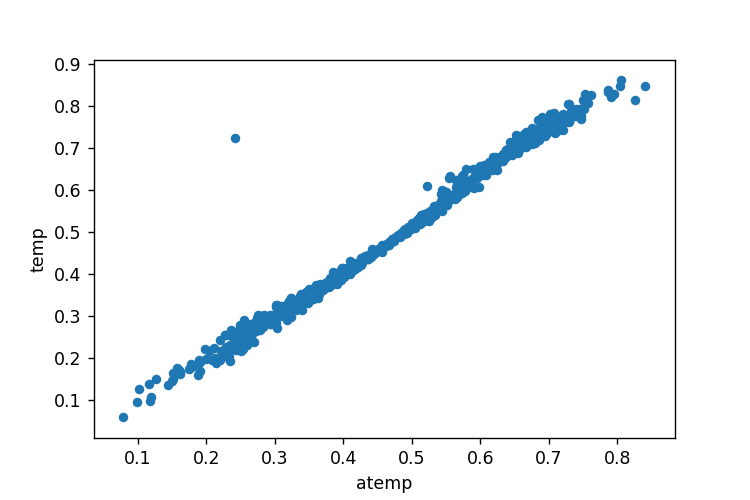

In [167]:
bikes.plot.scatter(x='atemp', y="temp")

<IPython.core.display.Javascript object>


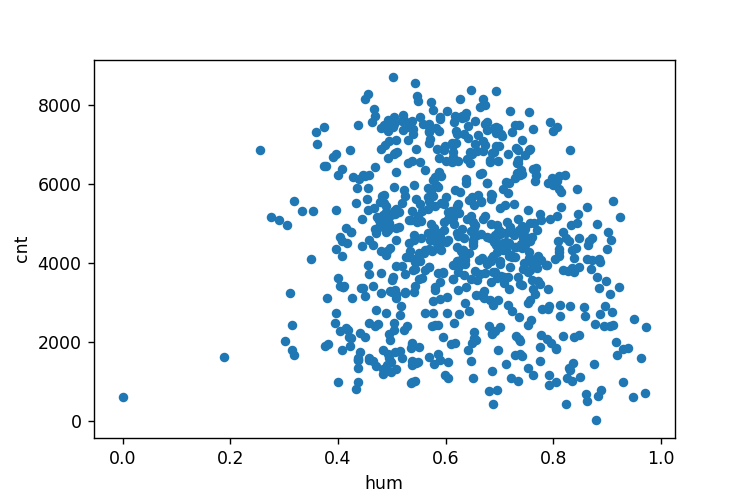

In [168]:
bikes.plot.scatter(x='hum', y="cnt")

<IPython.core.display.Javascript object>


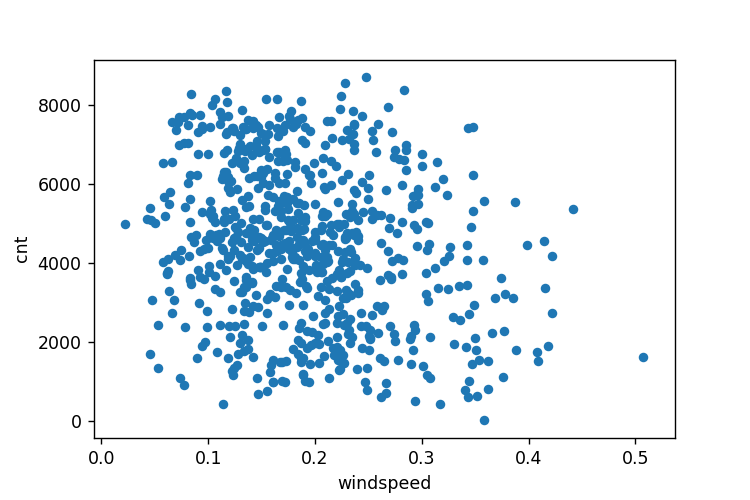

In [204]:
bikes.plot.scatter(x='windspeed', y="cnt")

<IPython.core.display.Javascript object>


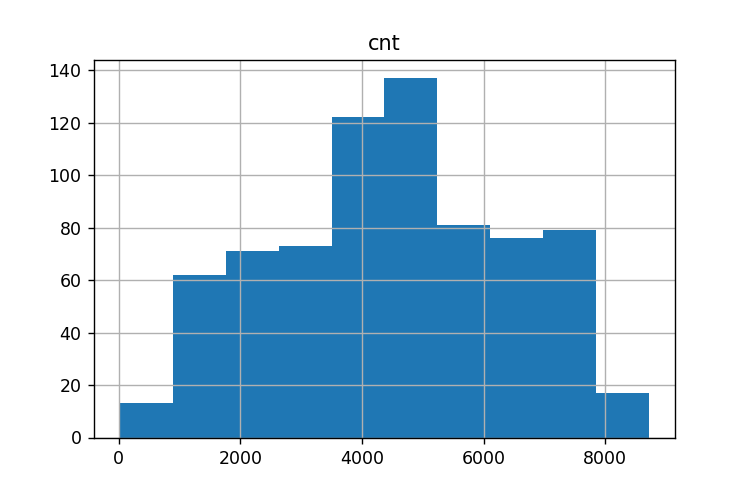

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000016D98358>]], dtype=object)

In [170]:
bikes.hist("cnt")

# Split in training and test sets

In [172]:
train, test = train_test_split(bikes, test_size=0.2, random_state=0)

In [173]:
print (len(train), len(test))

(584, 147)


# Fit the model

In [174]:
columns = ["temp", "windspeed", "hum", "yr", "mnth", "weekday", "holiday"]

model1 = LinearRegression(normalize=True)
model1.fit(train[columns], train[["cnt"]])
print model1.coef_
print model1.intercept_ 


[[ 5963.37545383 -3907.69887717 -2641.86137286  1918.14984468
     92.85552367    61.03928463  -393.67190262]]
[ 2220.08424678]


# Train Error

In [175]:
predicted = model1.predict(train[columns])
print("RMSE: ", math.sqrt(mean_squared_error(train[["cnt"]], predicted)))
print("R2:", model1.score(train[columns], train["cnt"]))


('RMSE: ', 924.2122275624345)
('R2:', 0.7640424753309154)


# Test Error

In [176]:
predicted = model1.predict(test[columns])
print("RMSE: ", math.sqrt(mean_squared_error(test[["cnt"]], predicted)))
print("R2:", model1.score(test[columns], test["cnt"]))



('RMSE: ', 1077.0158822014378)
('R2:', 0.72726916113935125)


In [177]:
miniDataset = train.iloc[0:10]
miniDataset["predicted"] = model1.predict(miniDataset[columns])
miniDataset

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,predicted
97,98,4/8/2011,2,0,4,0,5,1,2,0.335833,0.324479,0.836250,0.226992,172,1299,1471,1803.128077
503,504,5/18/2012,2,1,5,0,5,1,1,0.564167,0.551121,0.523333,0.136817,1521,6118,7639,6354.834898
642,643,10/4/2012,4,1,10,0,4,1,2,0.657500,0.607975,0.722917,0.117546,891,6437,7328,6862.684957
498,499,5/13/2012,2,1,5,0,0,0,1,0.612500,0.585238,0.576250,0.225117,2172,3946,6118,5853.017111
303,304,10/31/2011,4,0,10,0,1,1,1,0.340000,0.356063,0.703333,0.106350,362,3307,3669,2963.534362
570,571,7/24/2012,3,1,7,0,2,1,1,0.750833,0.706450,0.655000,0.211454,1140,6452,7592,6831.082651
250,251,9/8/2011,3,0,9,0,4,1,3,0.633913,0.555361,0.939565,0.192748,153,1689,1842,3844.800698
17,18,1/18/2011,1,0,1,0,2,1,2,0.216667,0.232333,0.861667,0.146775,9,674,683,877.127743
595,596,8/18/2012,3,1,8,0,6,0,1,0.678333,0.618071,0.603333,0.177867,2827,5038,7865,7003.495526
240,241,8/29/2011,3,0,8,0,1,1,1,0.636667,0.607958,0.554583,0.159825,729,3905,4634,4730.972702


# Adding Categorical columns

In [178]:
bikes = pd.read_csv("dataset/bikeSharingByDay.csv")
bikes["winter"] = bikes["season"] == 4
bikes["spring"] = bikes["season"] == 1
bikes["summer"] = bikes["season"] == 2
#bikes["fall"] = bikes["season"] == 3 // implicit!

# There's not item with weathersit == 4
#bikes["winter"] = bikes["weathersit"] == 4 

bikes["clear"] = bikes["weathersit"] == 1
bikes["mist"] = bikes["weathersit"] == 2
#bikes["rain"] = bikes["weathersit"] == 3 // implicit

train, test = train_test_split(bikes, test_size=0.2, random_state=0)
bikes.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,hum,windspeed,casual,registered,cnt,winter,spring,summer,clear,mist
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,...,0.805833,0.160446,331,654,985,False,True,False,False,True
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,...,0.696087,0.248539,131,670,801,False,True,False,False,True
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,...,0.437273,0.248309,120,1229,1349,False,True,False,True,False
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,...,0.590435,0.160296,108,1454,1562,False,True,False,True,False
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,...,0.436957,0.186900,82,1518,1600,False,True,False,True,False


In [190]:
columns = ["temp", "windspeed", "hum", "yr", "mnth", "weekday", "holiday", "winter", "spring", "summer", "clear", "mist"]

model1 = LinearRegression(normalize=True)
model1.fit(train[columns], train[["cnt"]])
print model1.coef_
print model1.intercept_ 

[[ 5157.76145175 -3014.23427489 -1395.8317155   1965.22841316
     -7.64177179    62.90583478  -455.3633743    647.30944398
   -868.31363449   204.57653663  1868.01801443  1487.93215299]]
[ 600.59451311]


In [191]:
predicted = model1.predict(train[columns])
print("RMSE: ", math.sqrt(mean_squared_error(train[["cnt"]], predicted)))
print("R2:", model1.score(train[columns], train["cnt"]))

('RMSE: ', 805.5245504965953)
('R2:', 0.82075461866758992)


In [192]:
predicted = model1.predict(test[columns])
print("RMSE: ", math.sqrt(mean_squared_error(test[["cnt"]], predicted)))
print("R2:", model1.score(test[columns], test["cnt"]))


('RMSE: ', 819.5080089824824)
('R2:', 0.84209479803843612)
